In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 13s 1us/step


In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
img = x_train[0]

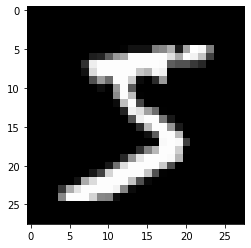

In [10]:
plt.imshow(img,cmap='gray')

In [13]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [14]:
from tensorflow.keras.utils import to_categorical

In [40]:
y_cat_test = to_categorical(y_test,num_classes=10)
y_cat_train = to_categorical(y_train,10)

In [42]:
y_cat_test.shape

(10000, 10)

In [44]:
y_cat_train.shape

(60000, 10)

In [25]:
img = img/255.0

In [29]:
x_train=x_train/255.0
x_test=x_test/255.0

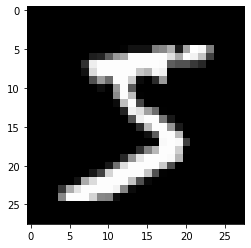

In [32]:
plt.imshow(x_train[0],cmap='gray')

In [33]:
x_train = x_train.reshape(60000,28,28,1)

In [34]:
x_test = x_test.reshape(10000,28,28,1)

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPool2D

In [36]:
model = Sequential()
#First layer is CN 2d
#filters power of 2 increase with complexity of task
model.add(Conv2D(filters=32,kernel_size = (4,4),
                input_shape = (28,28,1),activation = 'relu')) #padding valid vs same

model.add(MaxPool2D())

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics = ['accuracy'])

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

In [38]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [45]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),
         callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.1397 - accuracy: 0.9579 - val_loss: 0.0624 - val_accuracy: 0.9792
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0483 - accuracy: 0.9850 - val_loss: 0.0402 - val_accuracy: 0.9857
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0302 - accuracy: 0.9907 - val_loss: 0.0445 - val_accuracy: 0.9857


In [88]:
model.fit(x_train,y_cat_train,epochs=3,validation_data=(x_test,y_cat_test))

Epoch 1/3
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0208 - accuracy: 0.9934 - val_loss: 0.0370 - val_accuracy: 0.9882
Epoch 2/3
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0145 - accuracy: 0.9954 - val_loss: 0.0439 - val_accuracy: 0.9868
Epoch 3/3
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0110 - accuracy: 0.9964 - val_loss: 0.0367 - val_accuracy: 0.9887


In [89]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.020849,0.993400,0.036986,0.9882
1,0.014507,0.995350,0.043930,0.9868
2,0.011003,0.996417,0.036734,0.9887


<AxesSubplot:>

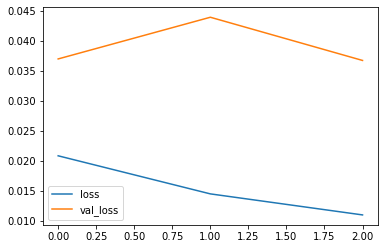

In [90]:
metrics[['loss','val_loss']].plot()

In [91]:
from sklearn.metrics import classification_report, confusion_matrix

In [92]:
predictions = model.predict_classes(x_test)

C:\Users\shiva\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [93]:
print(confusion_matrix(y_test,predictions))

[[ 976    0    0    0    0    0    3    1    0    0]
 [   1 1129    0    1    1    1    1    1    0    0]
 [   1    1 1019    0    1    0    0    6    4    0]
 [   0    0    1 1001    0    3    0    2    3    0]
 [   0    0    0    0  974    0    1    0    0    7]
 [   1    0    1    6    0  881    1    0    1    1]
 [   6    1    0    0    2    5  941    0    3    0]
 [   1    0    2    1    0    0    0 1021    1    2]
 [   3    0    1    4    0    1    0    3  958    4]
 [   2    1    1    1    7    2    0    4    4  987]]


In [94]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



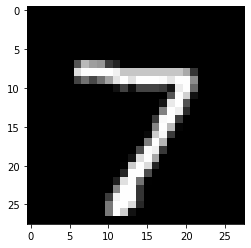

In [95]:
plt.imshow(x_test[0].reshape(28,28),cmap='gray')

In [96]:
model.predict_classes(x_test[0].reshape(1,28,28,1))

array([7], dtype=int64)

In [97]:
model.save("my_model2")

# It can be used to reconstruct the model identically.
#reconstructed_model = keras.models.load_model("my_model")

INFO:tensorflow:Assets written to: my_model2\assets


In [68]:
testset = pd.read_csv('test.csv')

In [75]:
test=testset.values

In [76]:
test=test/255.0

In [83]:
testset

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
test = test.reshape(28000,28,28,1)

In [98]:
pred = model.predict_classes(test)

C:\Users\shiva\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [99]:
pred.shape

(28000,)

In [100]:
df = pd.DataFrame({"ImageId":np.arange(1,28000+1),"Label":pred})

In [101]:
df.to_csv('Results3.csv',index=False)

In [102]:
import gradio as gr

In [107]:
def recognize_digit(draw_digit):
    return (model.predict_classes(draw_digit.reshape(1,28,28,1)))[0]

In [108]:
gr.Interface(fn=recognize_digit, inputs="sketchpad", outputs="label").launch(share=True)

Running locally at: http://127.0.0.1:7862/
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://27878.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7862/',
 'https://27878.gradio.app')

Socket exception: An existing connection was forcibly closed by the remote host (10054)
Socket exception: An existing connection was forcibly closed by the remote host (10054)
Socket exception: An existing connection was forcibly closed by the remote host (10054)
C:\Users\shiva\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\shiva\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01